## 1. Maximization of Functions using Gradient Descent

**Task**:
- (a) Maximize the function $f(x) = -x^4 + 4x^2 - 2x + 1$, where $f: \mathbb{R} \to \mathbb{R}$, using gradient ascent. Implement the optimization using PyTorch and plot the convergence over iterations.
- (b) Maximize the function $f(x, y, z) = -x^2 - y^2 - z^2 + 2xy - yz + 3z$, where $f: \mathbb{R}^3 \to \mathbb{R}$, using gradient ascent. Implement the optimization using PyTorch and visualize the optimization path.

In [250]:
!pip install torch matplotlib

In [251]:
import torch
import matplotlib.pyplot as plt

a)

In [252]:
# define the function f(x) = -x^4 + 4x^2 - 2x + 1
def f_single(x):
    return -x**4 + 4*x**2 - 2*x + 1

$x_{k + 1} = x_k + \eta \frac{\partial{f}}{\partial{x}}$, where $\eta$ is the learning rate

$\frac{\partial{f}}{\partial{x}} = -4x^3 + 8x - 2$

In [253]:
# gradient ascent for single-variable function
def gradient_ascent_f_single(x, learning_rate, iterations):
	x = torch.tensor(x, requires_grad=True)  # starting point
	values_a = []

	for _ in range(iterations):
		loss = f_single(x)
		loss.backward()
		values_a.append((x.item(), loss.item()))
		with torch.no_grad():
			x += learning_rate * x.grad  # update x using gradient ascent
			x.grad.zero_()  # reset gradient

	# Extract values for plotting
	x_vals_a, f_vals_a = zip(*values_a)
	return x_vals_a, f_vals_a

Plotting

In [254]:
def plot_convergence_x(iterations, x_vals_a):
	plt.figure(figsize=(8, 5))
	plt.plot(range(iterations), x_vals_a, label="x")
	plt.title("Convergence of Gradient Ascent (Single-variable)")
	plt.xlabel("Iteration")
	plt.ylabel("x")
	plt.legend()
	plt.grid()
	plt.show()

def plot_convergence_y(iterations, f_vals_a):
	plt.figure(figsize=(8, 5))
	plt.plot(range(iterations), f_vals_a, label="f(x)")
	plt.title("Convergence of Gradient Ascent (Single-variable)")
	plt.xlabel("Iteration")
	plt.ylabel("f(x)")
	plt.legend()
	plt.grid()
	plt.show()

In [255]:
learning_rate = 0.01
iterations = 100
x = [0.0]

In [256]:
x_vals_a, f_vals_a = gradient_ascent_f_single(x, learning_rate, iterations)

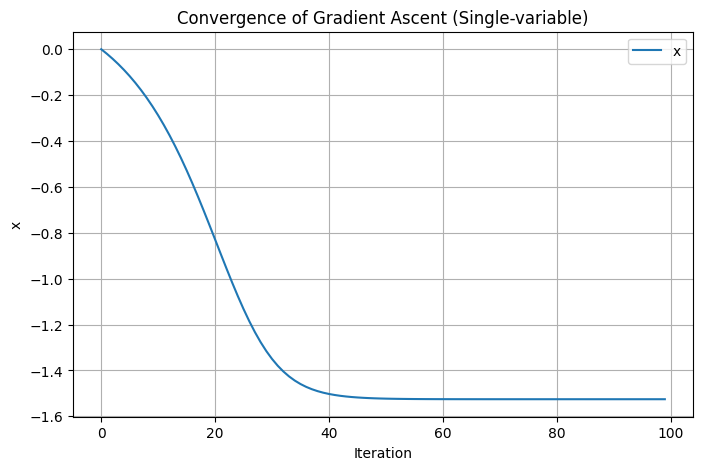

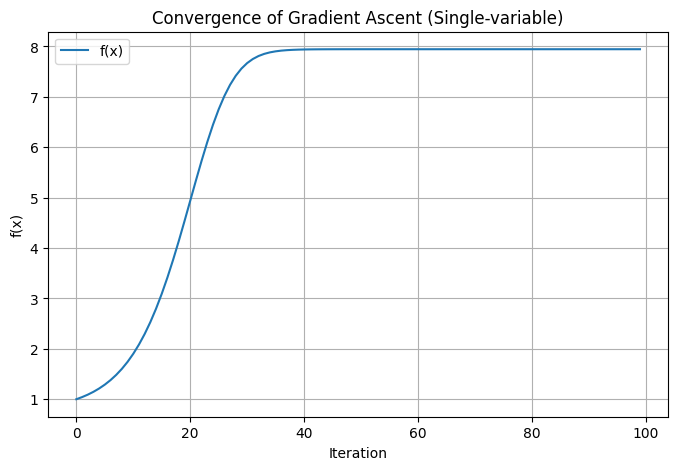

In [257]:
plot_convergence_x(iterations, x_vals_a)
plot_convergence_y(iterations, f_vals_a)

b)

In [258]:
# define the function f(x, y, z) = -x^2 - y^2 - z^2 + 2xy - yz + 3z
def f_multi(x, y, z):
    return -x**2 - y**2 - z**2 + 2*x*y - y*z + 3*z

$x_{k + 1} = x_k + \eta \frac{\partial{f}}{\partial{x}}$, \
$y_{k + 1} = y_k + \eta \frac{\partial{f}}{\partial{y}}$, \
$z_{k + 1} = z_k + \eta \frac{\partial{f}}{\partial{z}}$, where $\eta$ is the learning rate

$\frac{\partial{f}}{\partial{x}} = -2x+2y$ \
$\frac{\partial{f}}{\partial{y}} = -2y+2x-z$ \
$\frac{\partial{f}}{\partial{z}} = -2z-y+3$

In [259]:
def gradient_ascent_f_multi(x, y, z, learning_rate, iterations):
	x, y, z = torch.tensor(x, requires_grad=True), \
			torch.tensor(y, requires_grad=True), \
			torch.tensor(z, requires_grad=True)

	values_b = []

	for _ in range(iterations):
		loss = f_multi(x, y, z)
		loss.backward()
		values_b.append((x.item(), y.item(), z.item(), loss.item()))
		with torch.no_grad():
			x += learning_rate * x.grad  # Update x
			y += learning_rate * y.grad  # Update y
			z += learning_rate * z.grad  # Update z
			x.grad.zero_()  # Reset gradient
			y.grad.zero_()
			z.grad.zero_()

	# Extract values for visualization
	x_vals_b, y_vals_b, z_vals_b, f_vals_b = zip(*values_b)
	return x_vals_b, y_vals_b, z_vals_b, f_vals_b

In [260]:
def plot_optimization_path(x_vals_b, y_vals_b, z_vals_b):
	fig = plt.figure(figsize=(10, 7))
	ax = fig.add_subplot(111, projection='3d')
	ax.plot(x_vals_b, y_vals_b, z_vals_b, label="Optimization Path", marker="o")
	ax.set_title("Optimization Path in 3D Space")
	ax.set_xlabel("x")
	ax.set_ylabel("y")
	ax.set_zlabel("z")
	ax.legend()
	plt.show()

In [261]:
x, y, z = [0.0], [0.0], [0.0]
learning_rate = 0.01
iterations = 1000

In [262]:
x_vals_b, y_vals_b, z_vals_b, f_vals_b = gradient_ascent_f_multi(x, y, z, learning_rate, iterations)

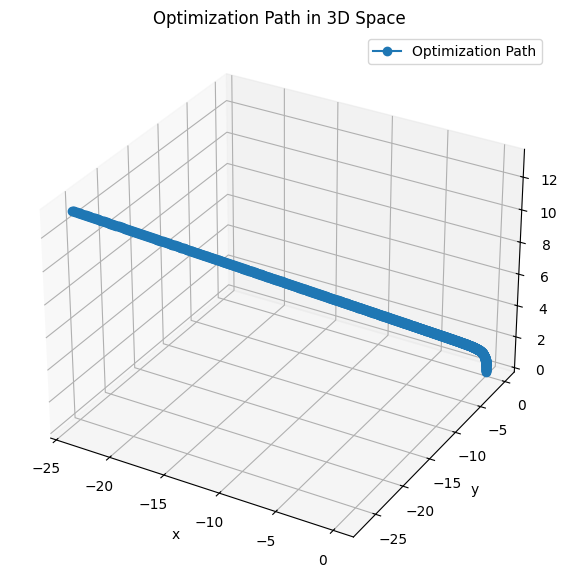

In [263]:
plot_optimization_path(x_vals_b, y_vals_b, z_vals_b)

It seems that this function has no maximum value. Wolfram alpha also confirms this.

Some experiments

In [264]:
!pip install plotly

In [265]:
# # plots for fun

# import plotly.graph_objects as go

# # Create an interactive 3D plot
# fig = go.Figure()

# # Add the optimization path
# fig.add_trace(go.Scatter3d(
#     x=x_vals_b, 
#     y=y_vals_b, 
#     z=z_vals_b, 
#     mode='markers+lines',
#     marker=dict(size=5, color=f_vals_b, colorscale='Viridis', showscale=True),
#     line=dict(color='blue', width=2),
#     name='Optimization Path'
# ))

# # Set plot titles and labels
# fig.update_layout(
#     title="Optimization Path in 3D Space",
#     scene=dict(
#         xaxis_title="x",
#         yaxis_title="y",
#         zaxis_title="z"
#     )
# )

# # Show the plot
# fig.show()

In [266]:
# from mpl_toolkits.mplot3d import Axes3D

# # %matplotlib qt

# # Create the interactive 3D plot
# fig = plt.figure(figsize=(10, 7))
# ax = fig.add_subplot(111, projection='3d')

# # Plot the optimization path
# sc = ax.scatter(x_vals_b, y_vals_b, z_vals_b, c=f_vals_b, cmap='viridis', s=50)
# ax.plot(x_vals_b, y_vals_b, z_vals_b, color='blue', label='Optimization Path')

# # Add color bar
# cbar = plt.colorbar(sc, ax=ax, pad=0.1)
# cbar.set_label('Function Value f(x, y, z)')

# # Set labels
# ax.set_title("Optimization Path in 3D Space")
# ax.set_xlabel("x")
# ax.set_ylabel("y")
# ax.set_zlabel("z")

# # Enable mouse rotation
# plt.legend()
# plt.show()

In [267]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_function_and_derivatives(func, dims, ranges, grid_points=100):
    """
    Plots a given function and its partial derivatives for 1D, 2D, or 3D inputs.
    
    Parameters:
        func (callable): A PyTorch function that takes a tensor of shape [N, dims].
        dims (int): Number of dimensions of the input space (1, 2, or 3).
        ranges (list of tuple): List of ranges for each dimension [(min_x, max_x), (min_y, max_y), ...].
        grid_points (int): Number of points in each dimension.
    """
    if dims == 1:
        # Handle 1D function case
        x = torch.linspace(ranges[0][0], ranges[0][1], grid_points, requires_grad=True)
        f = func(x.unsqueeze(1))
        f.backward(torch.ones_like(f))
        x_grad = x.grad

        plt.figure(figsize=(10, 5))
        plt.plot(x.detach().numpy(), f.detach().numpy(), label='Function')
        plt.plot(x.detach().numpy(), x_grad.detach().numpy(), label='Derivative')
        plt.title('Function and Its Derivative (1D)')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.legend()
        plt.grid()
        plt.show()

    elif dims == 2:
        # Handle 2D function case
        x = torch.linspace(ranges[0][0], ranges[0][1], grid_points, requires_grad=True)
        y = torch.linspace(ranges[1][0], ranges[1][1], grid_points, requires_grad=True)
        X, Y = torch.meshgrid(x, y, indexing='xy')
        points = torch.stack([X.flatten(), Y.flatten()], dim=1)

        Z = func(points).reshape(grid_points, grid_points)

        Z_grad_x, Z_grad_y = torch.autograd.grad(
            Z.sum(), [X, Y], retain_graph=True, create_graph=True
        )

        fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={"projection": "3d"})

        axs[0].plot_surface(X.detach().numpy(), Y.detach().numpy(), Z.detach().numpy(), cmap="viridis")
        axs[0].set_title('Function')
        axs[0].set_xlabel('x')
        axs[0].set_ylabel('y')
        axs[0].set_zlabel('f(x, y)')

        axs[1].plot_surface(X.detach().numpy(), Y.detach().numpy(), Z_grad_x.detach().numpy(), cmap="plasma")
        axs[1].set_title('Partial Derivative w.r.t x')
        axs[1].set_xlabel('x')
        axs[1].set_ylabel('y')
        axs[1].set_zlabel('∂f/∂x')

        axs[2].plot_surface(X.detach().numpy(), Y.detach().numpy(), Z_grad_y.detach().numpy(), cmap="inferno")
        axs[2].set_title('Partial Derivative w.r.t y')
        axs[2].set_xlabel('x')
        axs[2].set_ylabel('y')
        axs[2].set_zlabel('∂f/∂y')

        plt.show()

    elif dims == 3:
        # Handle 3D function case
        x = torch.linspace(ranges[0][0], ranges[0][1], grid_points, requires_grad=True)
        y = torch.linspace(ranges[1][0], ranges[1][1], grid_points, requires_grad=True)
        z = torch.linspace(ranges[2][0], ranges[2][1], grid_points, requires_grad=True)

        X, Y, Z = torch.meshgrid(x, y, z, indexing='xy')
        points = torch.stack([X.flatten(), Y.flatten(), Z.flatten()], dim=1)

        W = func(points).reshape(grid_points, grid_points, grid_points)

        # Compute derivatives
        W_grad_x, W_grad_y, W_grad_z = torch.autograd.grad(
            W.sum(), [X, Y, Z], retain_graph=True, create_graph=True
        )

        # Visualizing slices along x=0, y=0, z=0
        mid = grid_points // 2
        fig, axs = plt.subplots(1, 4, figsize=(24, 6))

        axs[0].imshow(W[mid, :, :].detach().numpy(), extent=(ranges[1][0], ranges[1][1], ranges[2][0], ranges[2][1]), origin='lower')
        axs[0].set_title('Function (x=0 slice)')

        axs[1].imshow(W_grad_x[mid, :, :].detach().numpy(), extent=(ranges[1][0], ranges[1][1], ranges[2][0], ranges[2][1]), origin='lower')
        axs[1].set_title('∂f/∂x (x=0 slice)')

        axs[2].imshow(W_grad_y[:, mid, :].detach().numpy(), extent=(ranges[0][0], ranges[0][1], ranges[2][0], ranges[2][1]), origin='lower')
        axs[2].set_title('∂f/∂y (y=0 slice)')

        axs[3].imshow(W_grad_z[:, :, mid].detach().numpy(), extent=(ranges[0][0], ranges[0][1], ranges[1][0], ranges[1][1]), origin='lower')
        axs[3].set_title('∂f/∂z (z=0 slice)')

        plt.show()

    else:
        # For higher dimensions, compute derivatives but do not plot
        ranges_tensor = [torch.linspace(r[0], r[1], grid_points, requires_grad=True) for r in ranges]
        mesh = torch.meshgrid(*ranges_tensor, indexing='xy')
        points = torch.stack([m.flatten() for m in mesh], dim=1)

        f = func(points)
        gradients = torch.autograd.grad(f.sum(), mesh, retain_graph=True, create_graph=True)

        print("Higher-dimensional function analysis:")
        print("Function values (flattened):", f.detach().numpy())
        for i, grad in enumerate(gradients):
            print(f"Gradient along dimension {i} (flattened):", grad.detach().numpy())


In [268]:
# Define a 4D function
def f_4d(points):
    x = points[:, 0]
    y = points[:, 1]
    z = points[:, 2]
    w = points[:, 3]
    return x**2 + y**2 - z**2 + w**2

plot_function_and_derivatives(f_4d, dims=4, ranges=[(-1, 1), (-1, 1), (-1, 1), (-1, 1)])

Higher-dimensional function analysis:
Function values (flattened): [2.        1.9600041 1.9208245 ... 1.9208245 1.9600041 2.       ]
Gradient along dimension 0 (flattened): [[[[-2.        -2.        -2.        ... -2.        -2.
    -2.       ]
   [-2.        -2.        -2.        ... -2.        -2.
    -2.       ]
   [-2.        -2.        -2.        ... -2.        -2.
    -2.       ]
   ...
   [-2.        -2.        -2.        ... -2.        -2.
    -2.       ]
   [-2.        -2.        -2.        ... -2.        -2.
    -2.       ]
   [-2.        -2.        -2.        ... -2.        -2.
    -2.       ]]

  [[-1.9595959 -1.9595959 -1.9595959 ... -1.9595959 -1.9595959
    -1.9595959]
   [-1.9595959 -1.9595959 -1.9595959 ... -1.9595959 -1.9595959
    -1.9595959]
   [-1.9595959 -1.9595959 -1.9595959 ... -1.9595959 -1.9595959
    -1.9595959]
   ...
   [-1.9595959 -1.9595959 -1.9595959 ... -1.9595959 -1.9595959
    -1.9595959]
   [-1.9595959 -1.9595959 -1.9595959 ... -1.9595959 -1.9595959


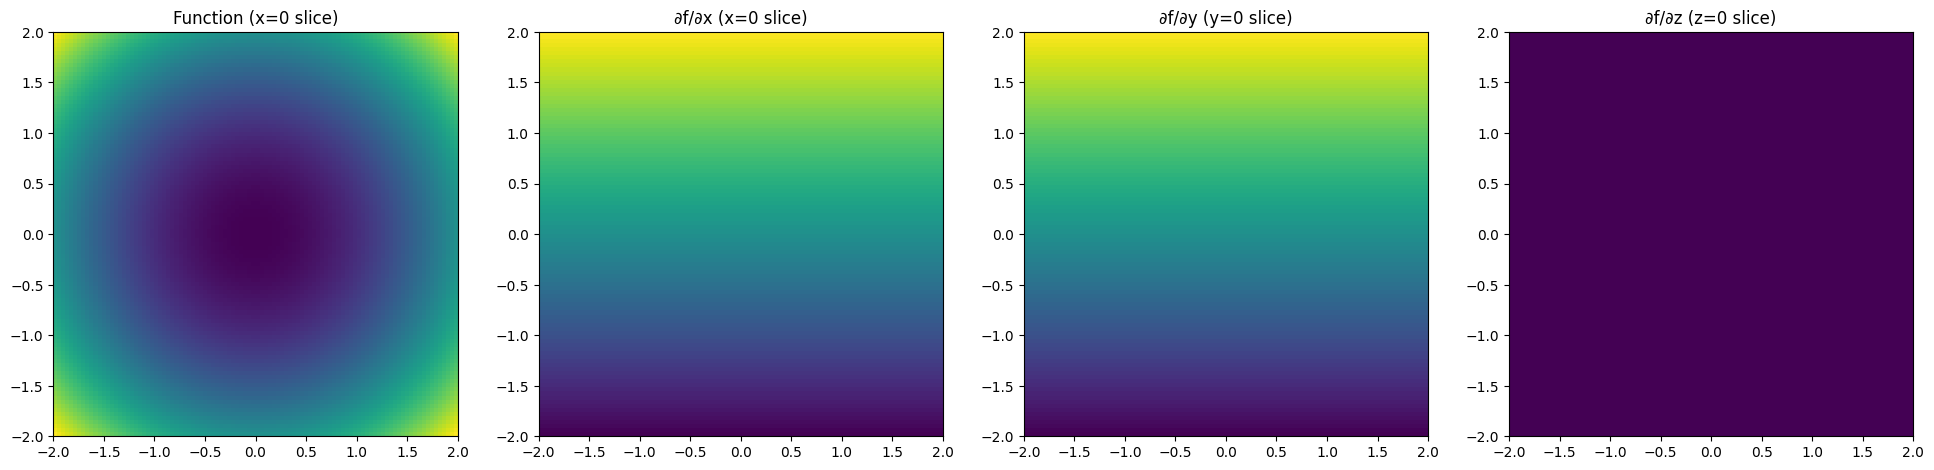

In [269]:
# Define a 3D function
def f_3d(points):
    x = points[:, 0]
    y = points[:, 1]
    z = points[:, 2]
    return x**2 + y**2 + z**2

plot_function_and_derivatives(f_3d, dims=3, ranges=[(-2, 2), (-2, 2), (-2, 2)])


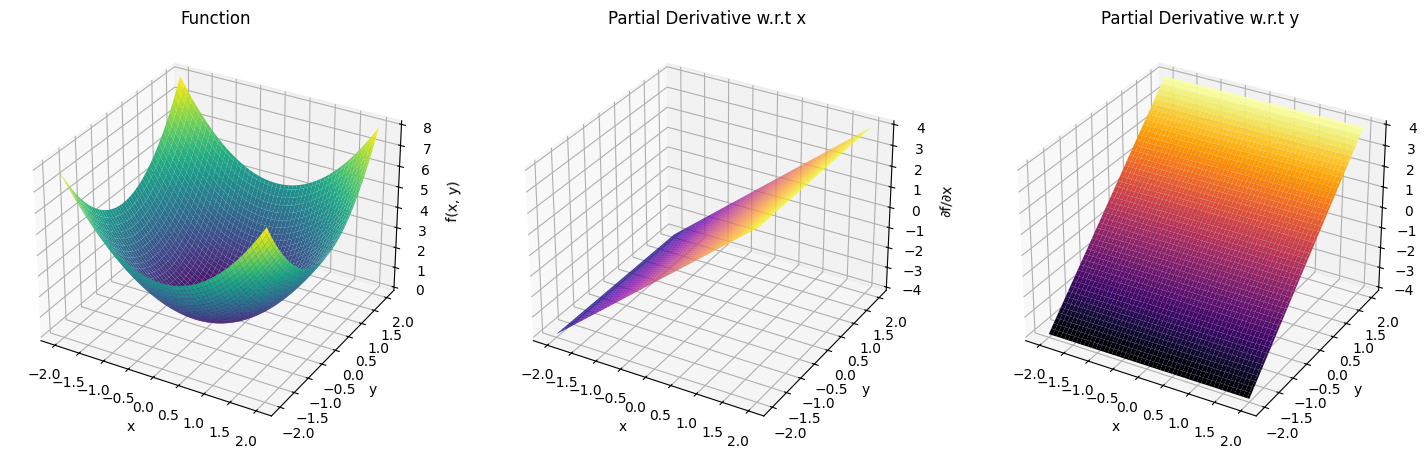

In [270]:
# Define a 2D function
def f_2d(points):
    x = points[:, 0]
    y = points[:, 1]
    return x ** 2 + y ** 2

plot_function_and_derivatives(f_2d, dims=2, ranges=[(-2, 2), (-2, 2)])


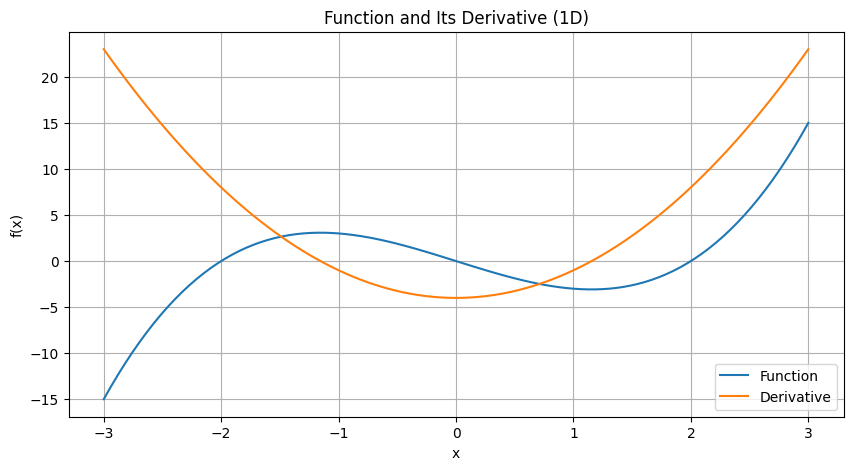

In [271]:
# Define a 1D function
def f_1d(x):
    return x ** 3 - 4 * x

plot_function_and_derivatives(f_1d, dims=1, ranges=[(-3, 3)])

## 2. Linear Regression in PyTorch

**Dataset**: Use the following code to generate a synthetic dataset with 100 samples, each with one feature:

```py
import numpy as np
np.random.seed(0)
X = np.random.uniform(-10, 10, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = 3 * X + 4 + epsilon
```

**Task**: Implement a linear regression model using PyTorch to predict the target variable $y$. Train the model to minimize the Mean Squared Error (MSE).

In [272]:
!pip install numpy torch matplotlib

In [273]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt

In [274]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

print(f"Using {device} device")

Using cpu device


In [275]:
# generate synthetic dataset
def get_data():
	np.random.seed(0)
	X = np.random.uniform(-10, 10, 100).reshape(-1, 1)
	epsilon = np.random.normal(0, 0.1, 100).reshape(-1, 1)
	y = 3 * X + 4 + epsilon
	return X, y

In [276]:
X, y = get_data()

In [277]:
# convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

In [278]:
# define the linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        # super().__init__()
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # one input feature, one output feature 

    def forward(self, x):
        return self.linear(x)

In [279]:
def train(model, loss_fn, optimizer, X_tensor, y_tensor, epochs, print_loss=True):
	losses = []

	for epoch in range(epochs):
		# forward pass
		y_pred = model(X_tensor)
		loss = loss_fn(y_pred, y_tensor)
		
		# backward pass
		optimizer.zero_grad()
		loss.backward()
		optimizer.step()

		losses.append(loss.item())
		
		# print loss every 100 epochs
		if print_loss and (epoch + 1) % 100 == 0:
			print(f'Epoch {epoch + 1}, Loss: {loss.item():.4f}')

	return losses

In [280]:
model = LinearRegressionModel().to(device)
print(model)

# define the loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

losses = train(model, loss_fn, optimizer, X_tensor, y_tensor, epochs=1000)

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Epoch 100, Loss: 0.4543
Epoch 200, Loss: 0.0180
Epoch 300, Loss: 0.0101
Epoch 400, Loss: 0.0099
Epoch 500, Loss: 0.0099
Epoch 600, Loss: 0.0099
Epoch 700, Loss: 0.0099
Epoch 800, Loss: 0.0099
Epoch 900, Loss: 0.0099
Epoch 1000, Loss: 0.0099


In [281]:
# print the learned parameters
weight = model.linear.weight.item()
bias = model.linear.bias.item()
print(f"Learned parameters: Weight = {weight:.4f}, Bias = {bias:.4f}")

Learned parameters: Weight = 2.9997, Bias = 4.0191


In [282]:
def plot_fitted_line(X, y, X_tensor):
	# model.eval()  # set the model to evaluation mode
    # with torch.no_grad():
        # y_pred = model(X_tensor).numpy()
	y_pred = model(X_tensor).detach().numpy()
	plt.scatter(X, y, label="Original data", alpha=0.7)
	plt.plot(X, y_pred, label="Fitted line", color="red")
	plt.xlabel("X")
	plt.ylabel("y")
	plt.legend()
	plt.show()

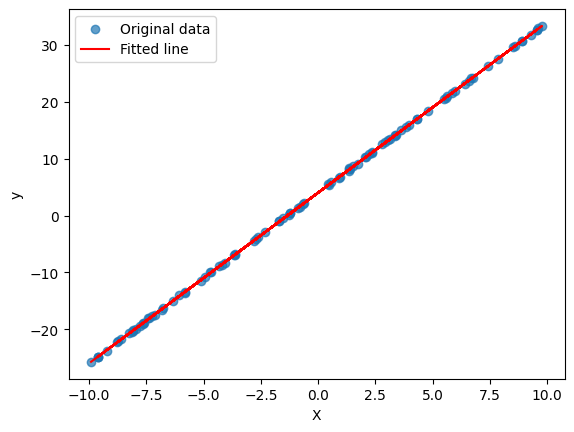

In [283]:
plot_fitted_line(X, y, X_tensor)

## 3. Learning Rate Analysis

**Dataset**: Use the same dataset from Problem 2.

**Task**: Modify the `gradient_descent()` function to include different learning rates (0.01, 0.1, 1.0). Visualize the convergence behaviors of gradient descent with each learning rate.

In [284]:
!pip install numpy torch matplotlib

In [285]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt

In [286]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

print(f"Using {device} device")

Using cpu device


In [287]:
# generate synthetic dataset
def get_data():
	np.random.seed(0)
	X = np.random.uniform(-10, 10, 100).reshape(-1, 1)
	epsilon = np.random.normal(0, 0.1, 100).reshape(-1, 1)
	y = 3 * X + 4 + epsilon
	return X, y

In [288]:
X, y = get_data()

In [289]:
# convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

In [290]:
# define the linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        # super().__init__()
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # one input feature, one output feature 

    def forward(self, x):
        return self.linear(x)

In [291]:
def test_learning_rates(X_tensor, y_tensor, learning_rates, epochs):
	all_losses = {}

	for lr in learning_rates:
		model = LinearRegressionModel().to(device)
		loss_fn = nn.MSELoss()
		optimizer = torch.optim.SGD(model.parameters(), lr=lr)

		losses = train(model, loss_fn, optimizer, X_tensor, y_tensor, epochs, print_loss=True)
		all_losses[lr] = losses
		
	return all_losses

In [292]:
learning_rates = [0.01, 0.1, 1.0]
epochs = 100

all_losses = test_learning_rates(X_tensor, y_tensor, learning_rates, epochs)

Epoch 100, Loss: 0.3898
Epoch 100, Loss: nan
Epoch 100, Loss: nan


In [293]:
def plot_convergence(all_losses, epochs):
	plt.figure(figsize=(10, 6))
	for lr, losses in all_losses.items():
		print(lr, losses)
		plt.plot(losses, label=f"Learning Rate: {lr}")
	
	plt.xlabel("Epochs")
	plt.ylabel("Loss")
	plt.title("Convergence of Gradient Descent for Different Learning Rates")
	plt.legend()
	plt.grid()
	plt.show()

0.01 [496.9715270996094, 70.83238983154297, 24.05056381225586, 18.345577239990234, 17.110769271850586, 16.3839168548584, 15.735313415527344, 15.117544174194336, 14.524598121643066, 13.954985618591309, 13.407733917236328, 12.88195514678955, 12.376814842224121, 11.89149284362793, 11.425220489501953, 10.977241516113281, 10.546849250793457, 10.133341789245605, 9.736064910888672, 9.354377746582031, 8.9876708984375, 8.635351181030273, 8.296860694885254, 7.971651077270508, 7.659205913543701, 7.359024524688721, 7.070619106292725, 6.79353141784668, 6.527321815490723, 6.271553993225098, 6.025828838348389, 5.789743423461914, 5.562922477722168, 5.345005035400391, 5.135638236999512, 4.934485912322998, 4.74122953414917, 4.555556774139404, 4.377170562744141, 4.205785751342773, 4.0411248207092285, 3.8829283714294434, 3.73093843460083, 3.5849123001098633, 3.444617509841919, 3.309828281402588, 3.1803274154663086, 3.055911064147949, 2.936375617980957, 2.821530818939209, 2.711193799972534, 2.6051867008209

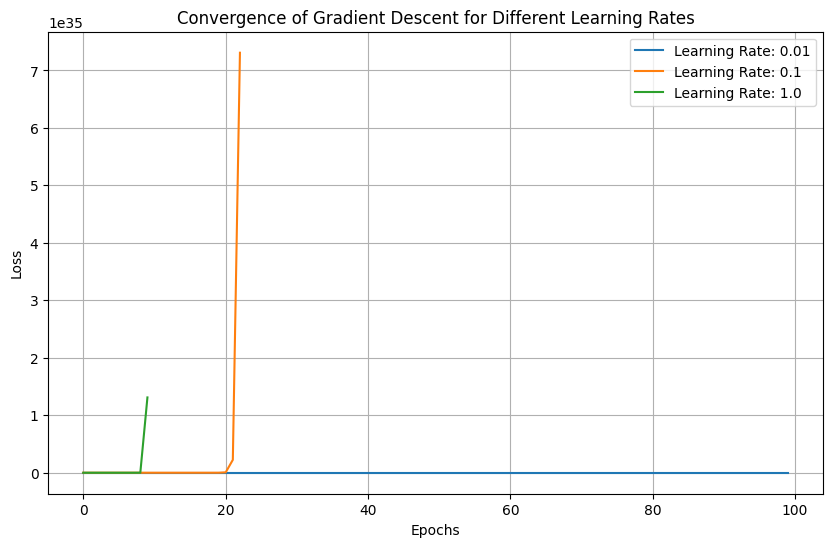

In [294]:
plot_convergence(all_losses, epochs)

## 4. Polynomial Regression Extension

**Dataset**: Use the following code to create a dataset of 100 samples:

```py
np.random.seed(1)
X = np.random.uniform(-5, 5, 100)
epsilon = np.random.normal(0, 0.5, 100)
y = 3 * X**3 - 2 * X**2 + 5 + epsilon
```

**Task**: Implement polynomial regression of degree 3 using PyTorch. Train the model and compare the training loss to that of a simple linear regression model.

In [295]:
!pip install numpy torch matplotlib

In [296]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt

In [297]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

print(f"Using {device} device")

Using cpu device


In [298]:
# generate synthetic dataset
def get_data():
	np.random.seed(1)
	X = np.random.uniform(-5, 5, 100)
	epsilon = np.random.normal(0, 0.5, 100)
	y = 3 * X**3 - 2 * X**2 + 5 + epsilon
	return X, y

In [299]:
X, y = get_data()

In [300]:
# define a general regression model
class PolynomialRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(PolynomialRegressionModel, self).__init__()
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)  # adjust input dimensions for polynomial features

    def forward(self, x):
        return self.linear(x)

In [301]:
# transform the dataset to include polynomial features
X_tensor = torch.tensor(X, dtype=torch.float32).view(-1, 1)
X_poly = np.vstack((X, X**2, X**3)).T  # create polynomial features up to degree 3
X_poly_tensor = torch.tensor(X_poly, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

In [302]:
def train(model, loss_fn, optimizer, X_poly_tensor, X_tensor, y_tensor, epochs, print_loss=True):
	losses = []

	for epoch in range(epochs):
		# forward pass
		y_pred = model(X_poly_tensor if model.linear.in_features > 1 else X_tensor.view(-1, 1))
		loss = loss_fn(y_pred, y_tensor)
		
		# backward pass
		optimizer.zero_grad()
		loss.backward()
		optimizer.step()

		losses.append(loss.item())
		
		# print loss every 100 epochs
		if print_loss and (epoch + 1) % 100 == 0:
			print(f'Epoch {epoch + 1}, Loss: {loss.item():.4f}')

	return losses

In [303]:
def plot_results(model, X, y, is_poly=True):
    model.eval()
    with torch.no_grad():
        if is_poly:
            y_pred = model(X_poly_tensor)
        else:
            y_pred = model(X_tensor.view(-1, 1))

    plt.scatter(X, y, label="Data", color="blue", alpha=0.5)
    plt.scatter(X, y_pred.numpy(), label="Predictions", color="red", alpha=0.7)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.title("Regression Results")
    plt.show()


Training Linear Regression...
Epoch 100, Loss: 3620.0276

Training Polynomial Regression...
Epoch 100, Loss: nan


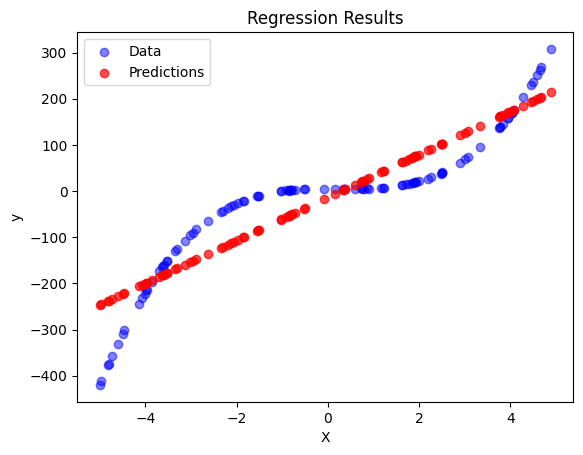

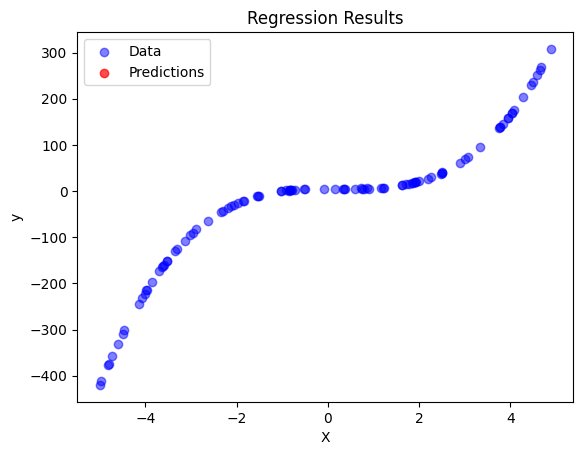

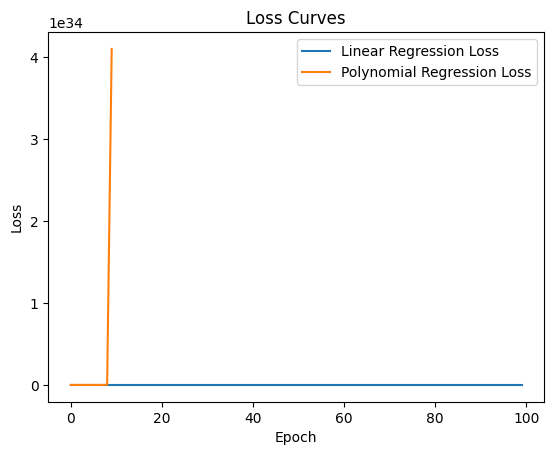

In [304]:
epochs = 100

# Train both models and compare
print("\nTraining Linear Regression...")
linear_model = LinearRegressionModel().to(device)
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(linear_model.parameters(), lr=0.01)
linear_losses = train(linear_model, loss_fn, optimizer, X_poly_tensor, X_tensor, y_tensor, epochs)

print("\nTraining Polynomial Regression...")
poly_model = PolynomialRegressionModel(3).to(device)
optimizer = torch.optim.SGD(poly_model.parameters(), lr=0.01)
poly_losses = train(poly_model, loss_fn, optimizer, X_poly_tensor, X_tensor, y_tensor, epochs)

# plot results
plot_results(linear_model, X, y, is_poly=False)
plot_results(poly_model, X, y, is_poly=True)

# loss curves
plt.plot(linear_losses, label="Linear Regression Loss")
plt.plot(poly_losses, label="Polynomial Regression Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curves")
plt.show()

## 5. Overfitting and Regularization

**Dataset**: Use the following code to generate a dataset with 150 samples:

```py
np.random.seed(2)
X = np.random.uniform(-10, 10, 150)
epsilon = np.random.normal(0, 1, 150)
y = 2 * X**2 + 3 * X + 1 + epsilon
```

**Task**: Fit two models: (i) a linear regression model, and (ii) a polynomial regression model of degree 10. Compare the training and validation performance of both models. Apply L2 regularization to the polynomial model and observe the effect on overfitting.

In [305]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge

In [306]:
def get_data():
	np.random.seed(2)
	X = np.random.uniform(-10, 10, 150)
	epsilon = np.random.normal(0, 1, 150)
	y = 2 * X**2 + 3 * X + 1 + epsilon
	return X, y

In [307]:
X, y = get_data()

In [308]:
# sort
indices = np.argsort(X)
X = X[indices]
y = y[indices]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

/home/jan/Studia/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.08433e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


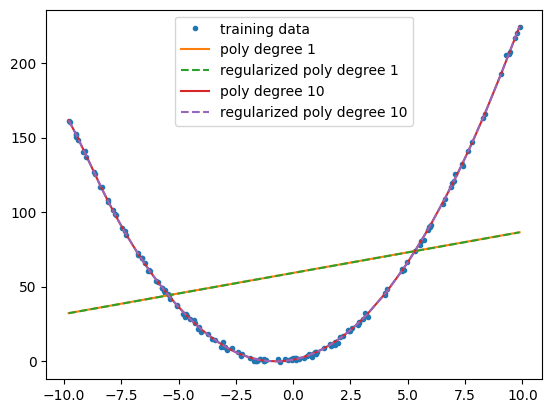

In [309]:
def expand(x, d):
    powers = np.arange(d + 1).reshape(1, -1)
    x_expanded = x.reshape(-1, 1) ** powers
    return x_expanded

class PolyRegression(LinearRegression):
    def __init__(self, degree):
        self.degree = degree
        super().__init__(fit_intercept=False)
    
    def fit(self, x, y):
        return super().fit(expand(x, self.degree), y)

    def predict(self, x):
        return super().predict(expand(x, self.degree)) 
    
class RegularizedPolyRegression(Ridge):
    def __init__(self, degree, alpha):
        self.degree = degree
        super().__init__(alpha=alpha, fit_intercept=False)
    
    def fit(self, x, y):
        return super().fit(expand(x, self.degree), y)

    def predict(self, x):
        return super().predict(expand(x, self.degree))


plt.plot(X, y, '.', label='training data')

degrees = [1, 10] # [1, 10, 20]

for degree in degrees:
    model = PolyRegression(degree).fit(X_train, y_train)
    plt.plot(X, model.predict(X), '-', label=f'poly degree {degree}')

    model = RegularizedPolyRegression(degree, 0.1).fit(X_train, y_train)
    plt.plot(X, model.predict(X), '--', label=f'regularized poly degree {degree}')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend()

## 6. Custom Gradient Descent in PyTorch

**Dataset**: Use the same dataset from Problem 2.

**Task**: Implement a custom gradient descent algorithm without using an optimizer from `torch.optim`. Train a linear regression model using this custom implementation and compare the training results with those obtained using PyTorch's `SGD` optimizer.

In [310]:
!pip install numpy torch matplotlib

In [311]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt

In [312]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

print(f"Using {device} device")

Using cpu device


In [313]:
def get_data():
	np.random.seed(0)
	X = np.random.uniform(-10, 10, 100).reshape(-1, 1)
	epsilon = np.random.normal(0, 0.1, 100).reshape(-1, 1)
	y = 3 * X + 4 + epsilon
	return X, y

In [314]:
X, y = get_data()

In [315]:
# convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

In [316]:
class CustomLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)  # one feature and one target

    def forward(self, x):
        return self.linear(x)

In [317]:
def train(model, loss_fn, optimizer, X_tensor, y_tensor, epochs, print_loss=True):
	losses = []

	for epoch in range(epochs):
		# forward pass
		y_pred = model(X_tensor)
		loss = loss_fn(y_pred, y_tensor)
		
		# backward pass
		optimizer.zero_grad()
		loss.backward()
		optimizer.step()

		losses.append(loss.item())
		
		# print loss every 100 epochs
		if print_loss and (epoch + 1) % 100 == 0:
			print(f'Epoch {epoch + 1}, Loss: {loss.item():.4f}')

	return losses

In [318]:
# custom gradient descent
def custom_train(model, loss_fn, learning_rate, X_tensor, y_tensor, epochs, print_loss=True):
	losses = []

	for epoch in range(epochs):
		# forward pass
		y_pred = model(X_tensor)
		loss = loss_fn(y_pred, y_tensor)
		
		# backward pass
		loss.backward()

		# manually update parameters
		with torch.no_grad():
			for param in model.parameters():
				param -= learning_rate * param.grad
		
		# zero the gradients
		model.zero_grad()

		losses.append(loss.item())
		
		# print loss every 100 epochs
		if print_loss and (epoch + 1) % 100 == 0:
			print(f'Epoch {epoch + 1}, Loss: {loss.item():.4f}')

	return losses

In [319]:
custom_model = CustomLinearRegressionModel().to(device)
model = LinearRegressionModel().to(device)

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
learning_rate = 0.01
epochs = 100

custom_losses = custom_train(custom_model, loss_fn, learning_rate, X_tensor, y_tensor, epochs)
losses = train(model, loss_fn, optimizer, X_tensor, y_tensor, epochs)

Epoch 100, Loss: 0.3247
Epoch 100, Loss: 0.2909


In [320]:
def plot_SGD_optimizer_vs_custom_gradient_decent(custom_losses, losses):
	# Plot the training loss
	plt.plot(custom_losses, label="Custom Gradient Descent Loss")
	plt.plot(losses, label="PyTorch SGD Optimizer Loss")
	plt.xlabel("Epoch")
	plt.ylabel("Loss")
	plt.legend()
	plt.title("Training Loss using Custom Gradient Descent")
	plt.show()

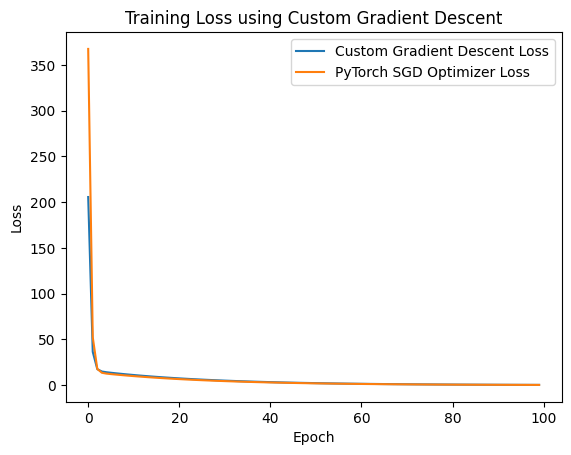

In [321]:
plot_SGD_optimizer_vs_custom_gradient_decent(custom_losses, losses)

In [322]:
# Compare the learned parameters
print(f"Custom Gradient Descent - Weight: {custom_model.linear.weight.item()}, Bias: {custom_model.linear.bias.item()}")
print(f"PyTorch SGD Optimizer - Weight: {model.linear.weight.item()}, Bias: {model.linear.bias.item()}")

Custom Gradient Descent - Weight: 2.9904515743255615, Bias: 3.466682195663452
PyTorch SGD Optimizer - Weight: 2.9909608364105225, Bias: 3.497157096862793


We can see that our implementation returns results very similar to those implemented in PyTorch, however, our implementation converges a bit slower

## 7. Dataset Size and Convergence

**Dataset**: Use the following code to create three datasets of sizes 50, 100, and 500 samples:

```py

np.random.seed(3)
sizes = [50, 100, 500]
datasets = []
for size in sizes:
    X = np.random.uniform(-10, 10, size)
    epsilon = np.random.normal(0, 0.2, size)
    y = 4 * X - 3 + epsilon
    datasets.append((X, y))

```


**Task**: Train linear regression models on each dataset using PyTorch. Compare the convergence rates of gradient descent for each dataset size by plotting the training loss over epochs.

In [323]:
!pip install numpy torch matplotlib

In [324]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt

In [325]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

print(f"Using {device} device")

Using cpu device


In [326]:
def get_data():
	np.random.seed(3)
	sizes = [50, 100, 500]
	datasets = []
	for size in sizes:
		X = np.random.uniform(-10, 10, size)
		epsilon = np.random.normal(0, 0.2, size)
		y = 4 * X - 3 + epsilon
		datasets.append((X, y))
	
	return datasets, sizes

In [327]:
datasets, sizes = get_data()

In [328]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [329]:
def train(model, loss_fn, optimizer, X_tensor, y_tensor, epochs, print_loss=True):
	losses = []

	for epoch in range(epochs):
		# forward pass
		y_pred = model(X_tensor)
		loss = loss_fn(y_pred, y_tensor)
		
		# backward pass
		optimizer.zero_grad()
		loss.backward()
		optimizer.step()

		losses.append(loss.item())
		
		# print loss every 100 epochs
		if print_loss and (epoch + 1) % 100 == 0:
			print(f'Epoch {epoch + 1}, Loss: {loss.item():.4f}')

	return losses

In [330]:
def plot_loss_curves(datasets, sizes):
    plt.figure(figsize=(10, 6))
    for (X, y), size in zip(datasets, sizes):
        X_tensor = torch.tensor(X, dtype=torch.float32).view(-1, 1)
        y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)
        
        model = LinearRegressionModel().to(device)
        optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
        loss_fn = nn.MSELoss()
        
        losses = train(model, loss_fn, optimizer, X_tensor, y_tensor, epochs=10)
        
        plt.plot(losses, label=f'Dataset size = {size}')
        
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Convergence of Gradient Descent with Different Dataset Sizes')
    plt.show()


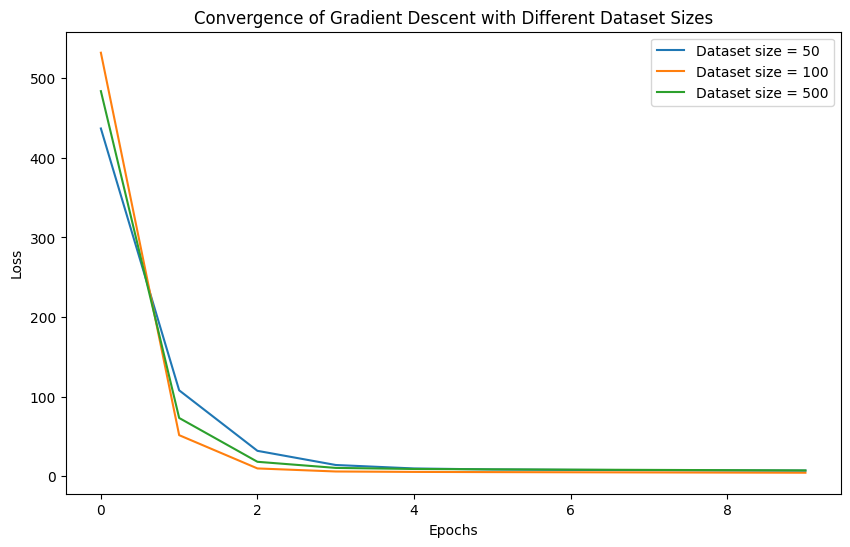

In [331]:
plot_loss_curves(datasets, sizes)

We can see that the larger the set, the faster it converges. \
This is intuitive, because the more points we have, the more we know about their arrangement and the easier it is for us to adjust the appropriate function parameters.

## 8. Effect of Model Complexity on Overfitting

**Dataset**: Use the following code to generate a dataset of 200 samples:

```py
np.random.seed(4)
X = np.random.uniform(-5, 5, 200)
epsilon = np.random.normal(0, 0.5, 200)
y = 2 * X**2 + X + epsilon
```

**Task**: Fit polynomial regression models of degrees 5 and 15 to the dataset. Plot the training and validation errors for both models.

In [332]:
!pip install numpy torch matplotlib

In [333]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt

In [334]:
def get_data():
	np.random.seed(4)
	X = np.random.uniform(-5, 5, 200)
	epsilon = np.random.normal(0, 0.5, 200)
	y = 2 * X**2 + X + epsilon
	return X, y

In [335]:
X, y = get_data()

In [336]:
indices = np.argsort(X)
X = X[indices]
y = y[indices]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
class PolynomialRegression(nn.Module):
	def __init__(self, degree):
		super().__init__()
		self.poly = nn.Linear(degree + 1, 1)

	def forward(self, x):
		return self.poly(x)

def expand_features(x, degree):
	poly_features = [x**i for i in range(degree + 1)]
	return torch.cat(poly_features, dim=1)

def train_model(model, optimizer, loss_fn, X_train, y_train, X_val, y_val, epochs):
	train_losses = []
	val_losses = []
	for epoch in range(epochs):
		# forward pass
		y_pred_train = model(X_train)
		y_pred_val = model(X_val)
		loss_train = loss_fn(y_pred_train, y_train)
		loss_val = loss_fn(y_pred_val, y_val)

		# backward pass
		optimizer.zero_grad()
		loss_train.backward()
		optimizer.step()

		train_losses.append(loss_train.item())
		val_losses.append(loss_val.item())

	return train_losses, val_losses

In [ ]:
degrees = [5, 15]
train_losses, val_losses = [], []

for degree in degrees:
	X_train_tensor = torch.tensor(X_train, dtype=torch.float32).view(-1, 1)
	y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
	X_val_tensor = torch.tensor(X_test, dtype=torch.float32).view(-1, 1)
	y_val_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

	X_train_tensor = expand_features(X_train_tensor, degree)
	X_val_tensor = expand_features(X_val_tensor, degree)
	
	model = PolynomialRegression(degree).to(device)
	optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
	loss_fn = nn.MSELoss()
	epochs = 20

	_train_losses, _val_losses = train_model(model, optimizer, loss_fn, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, epochs)
	train_losses.append(_train_losses)
	val_losses.append(_val_losses)

	plt.plot(_train_losses, label=f'Degree {degree} - Training Loss')
	plt.plot(_val_losses, '--', label=f'Degree {degree} - Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Losses for Polynomial Regression Models')
plt.show()

print(train_losses)
print(val_losses)

tensor([[-0.6818],
        [ 4.8121],
        [-3.0855],
        [-3.6525],
        [ 1.3685],
        [ 4.7627],
        [-3.3488],
        [-3.9181],
        [ 2.5282],
        [-0.3451],
        [ 1.1182],
        [ 3.9550],
        [-4.6612],
        [ 1.5748],
        [ 1.2357],
        [-0.9156],
        [ 2.3452],
        [ 0.3778],
        [ 3.9465],
        [ 0.2791],
        [ 3.6629],
        [ 0.3490],
        [-3.2683],
        [-4.2505],
        [-3.1755],
        [ 1.2415],
        [-2.5455],
        [ 4.5580],
        [ 0.0253],
        [ 2.2827],
        [-1.7168],
        [ 1.6656],
        [ 3.4371],
        [-2.7842],
        [ 1.2392],
        [ 1.1181],
        [-3.4811],
        [ 2.3338],
        [ 0.4329],
        [ 1.0074],
        [-4.9101],
        [-0.8322],
        [-2.3908],
        [ 4.4898],
        [ 4.6703],
        [-0.5487],
        [ 3.4047],
        [-3.1479],
        [ 4.5665],
        [-1.3635],
        [-3.7599],
        [ 2.3745],
        [ 0.

RuntimeError: mat1 and mat2 must have the same dtype, but got Double and Float

Degree 5 - Train Loss: 0.2707, Validation Loss: 0.2028
Degree 15 - Train Loss: 0.2514, Validation Loss: 0.2258


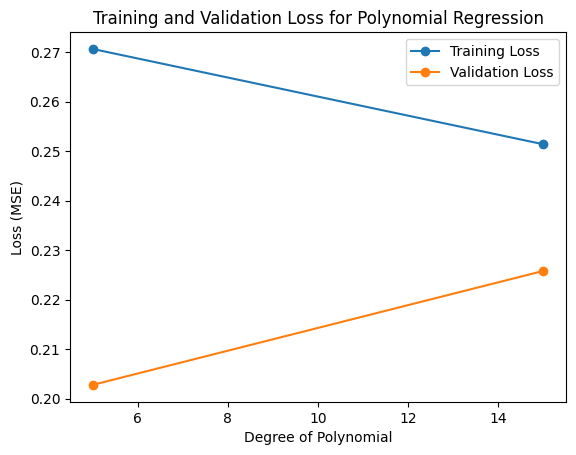

In [339]:
from sklearn.metrics import mean_squared_error

degrees = [5, 15]
train_losses, val_losses = [], []

for degree in degrees:
	model = PolyRegression(degree).fit(X_train, y_train)
	train_preds = model.predict(X_train)
	val_preds = model.predict(X_test)

	train_loss = mean_squared_error(y_train, train_preds)
	val_loss = mean_squared_error(y_test, val_preds)

	train_losses.append(train_loss)
	val_losses.append(val_loss)

	print(f"Degree {degree} - Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

# Now, plotting the loss curves
plt.figure()
plt.plot(degrees, train_losses, label='Training Loss', marker='o')
plt.plot(degrees, val_losses, label='Validation Loss', marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss for Polynomial Regression')
plt.legend()
plt.show()
	# plt.plot(train_loss, label=f'Degree {degree} - Training Loss')
	# plt.plot(val_loss, '--', label=f'Degree {degree} - Validation Loss')

We can see that the model with less degree performs better.

## 9. Gradient Descent for Non-linear Data

**Dataset**: Use the following code to generate a dataset of 100 samples:

```py
np.random.seed(5)
X = np.random.uniform(-2 * np.pi, 2 * np.pi, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = np.sin(X) + epsilon
```

**Task**: Implement gradient descent to fit a linear model to this dataset. Discuss the challenges and limitations of fitting a linear model to non-linear data.

In [340]:
!pip install numpy matplotlib

In [341]:
import numpy as np
import matplotlib.pyplot as plt

In [342]:
def get_data():
	np.random.seed(5)
	X = np.random.uniform(-2 * np.pi, 2 * np.pi, 100)
	epsilon = np.random.normal(0, 0.1, 100)
	y = np.sin(X) + epsilon
	return X, y

In [343]:
X, y = get_data()

In [344]:
def plot_dataset(X, y):
	plt.scatter(X, y, label="Data points", alpha=0.7)
	plt.xlabel("X")
	plt.ylabel("y")
	plt.title("Generated Dataset")
	plt.legend()
	plt.show()

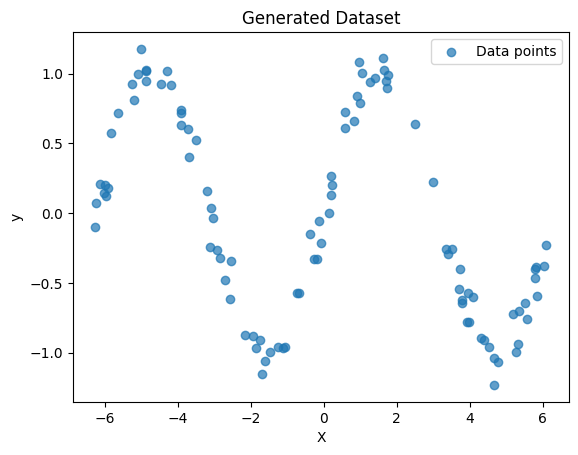

In [345]:
plot_dataset(X, y)

In [346]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [347]:
def custom_gradient_descent(model, X, y, learning_rate=0.01, epochs=20):
    loss_fn = nn.MSELoss()
    losses = []

    for epoch in range(epochs):
        model.train()
        
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        
        loss.backward()
        
        with torch.no_grad():
            for param in model.parameters():
                param -= learning_rate * param.grad
        
        model.zero_grad()
        
        losses.append(loss.item())
    
    return losses

In [348]:
X_tensor = torch.tensor(X, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

model = LinearRegressionModel().to(device)
losses = custom_gradient_descent(model, X_tensor, y_tensor, learning_rate=0.01, epochs=30)

In [349]:
def plot_loss_over_epochs(losses):
	plt.plot(losses, label="Training Loss")
	plt.xlabel("Epochs")
	plt.ylabel("Loss")
	plt.legend()
	plt.title("Training Loss using Custom Gradient Descent")
	plt.show()

In [350]:
def plot_linear_fit(X, y, X_tensor):
	model.eval()
	with torch.no_grad():
		y_pred = model(X_tensor)

	plt.scatter(X, y, label='Data points', alpha=0.7)
	plt.plot(X, y_pred.numpy(), label='Fitted Line', color='red')
	plt.xlabel('X')
	plt.ylabel('y')
	plt.legend()
	plt.title('Linear Fit to Non-linear Data')
	plt.show()

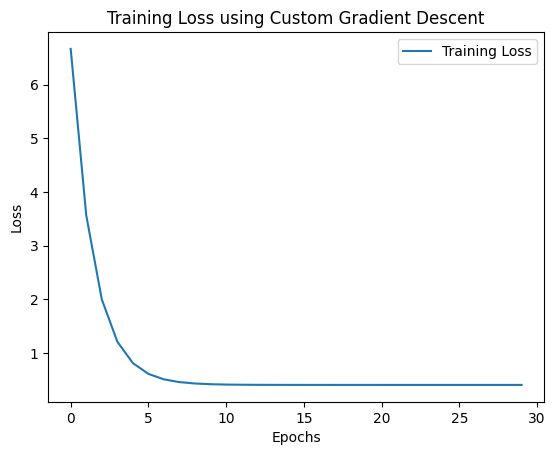

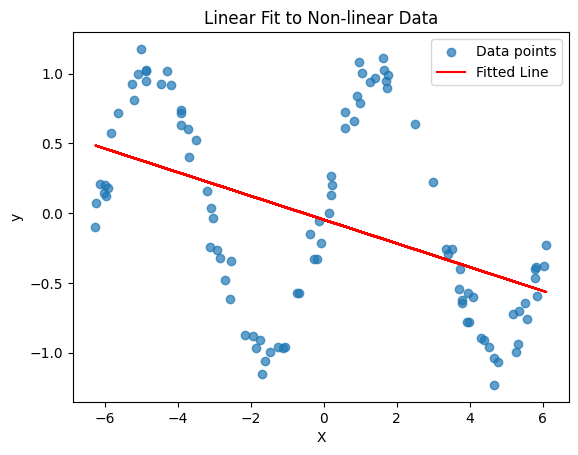

Learned parameters: Weight = -0.0849531963467598, Bias = -0.04720878228545189


In [351]:
plot_loss_over_epochs(losses)
plot_linear_fit(X, y, X_tensor)

print(f"Learned parameters: Weight = {model.linear.weight.item()}, Bias = {model.linear.bias.item()}")

In [352]:
# # Gradient Descent Implementation
# def gradient_descent(X, y, lr=0.01, epochs=1000):
#     n = len(X)
#     w, b = 0.0, 0.0  # Initialize weights and bias
#     losses = []

#     for _ in range(epochs):
#         # Predictions
#         y_pred = w * X + b
#         # Compute the loss
#         loss = np.mean((y - y_pred) ** 2)
#         losses.append(loss)
#         # Compute gradients
#         dw = (-2 / n) * np.sum(X * (y - y_pred))
#         db = (-2 / n) * np.sum(y - y_pred)
#         # Update parameters
#         w -= lr * dw
#         b -= lr * db

#     return w, b, losses

# # Fit the model
# w, b, losses = gradient_descent(X, y, lr=0.01, epochs=5000)

# print(f"Fitted model: y = {w:.3f}X + {b:.3f}")

In [353]:
# def plot_loss_over_epochs(losses):
# 	plt.plot(losses)
# 	plt.xlabel("Epochs")
# 	plt.ylabel("Loss")
# 	plt.title("Loss during Gradient Descent")
# 	plt.show()

In [354]:
# plot_loss_over_epochs(losses)

In [355]:
# def plot_linear_fit(X, y, w, b):
# 	# Plot the data and the linear fit
# 	plt.scatter(X, y, label="Data points", alpha=0.7)
# 	plt.plot(X, w * X + b, color="red", label=f"Linear fit: y = {w:.3f}X + {b:.3f}")
# 	plt.xlabel("X")
# 	plt.ylabel("y")
# 	plt.title("Linear Fit")
# 	plt.legend()
# 	plt.show()

In [356]:
# plot_linear_fit(X, y, w, b)